# AlertAI - Algorithms 
This notebook is responsible for the development the algorithms that will detect the anomalies in the data.
Last task of the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Supervised Learning

    3.1 Algorithm A

            a. Data preparation for the input

            b. Model Training

            c. Output results

4. Unsupervised Learning

    4.1 Algorithm B

            a. Data preparation for the input

            b. Model Training

            c. Output results

5. Model Export
6. Conclusions and Validation

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [8]:
import keras
from keras.utils import np_utils, get_file
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [14]:
dataset1 = pd.read_csv("data/sensor1_raw.csv")
dataset2 = pd.read_csv("data/sensor2_raw.csv")

dataUnified = pd.read_csv("unified_all.csv")

X = dataUnified[['pm25','pm10','temperature', 'gas', 'humidity', 'pressure', 'altitude']]
#y = dataUnified[['classification']]
y = pd.read_csv("target.csv")
y = y[['sensor1.classification']]

print(y.shape)

#Vou utilizar a biblioteca sklearn para dividir os dados de treino e de teste para já
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

(438, 1)


## 3. Supervised Learning
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Algoritmo "SVM (Support Vector Machine)"
Nota: Utilizando "kernel" porque penso que os dados não sejam linearmente separáveis

#### a. Data preparation for input

KeyError: "None of [Index(['classification'], dtype='object')] are in the [columns]"

#### b. Model Trainig

In [14]:
#SVC - Support Vector Classifier class (Scikit-Learn's svm library).
from sklearn.svm import SVC

#Polinomial 'poly & degree', Gaussian Kernel 'rbf', Sigmoid Kernel 'sigmoid'. 
svcclassifier = SVC(kernel = 'poly', degree = 6)
svcclassifier.fit(X_train, y_train)

y_pred = svcclassifier.predict(X_test)

NameError: name 'X_train' is not defined

#### c. Output results

In [9]:
from sklearn.matrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### 3.2 Algoritmo "Neural Networks"
Nota: Versão muito muito simples e inicial

#### a. Data preparation for input

#### b. Model Trainig

In [16]:
#Camadas do modelo
model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu'), #camada com 128 nodos
    keras.layers.Dense(7, activation = 'softmax') #x nodos = retorna array com x probabilidades - cada nó contém um valor que indica a prob de aquela imagem pertencer a uma das x classes
    #...
])

#Compilar o modelo
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#Treinar o modelo
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, batch_size = 64, verbose = 2) 
#primeira var - valores de treino, segunda var - respetivas labels

#### c. Output results

In [ ]:
#primeira var - valores de teste
#segunda var - respetivas labels
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Scores: ', scores)
print('Accuracy: ', test_acc)
print('Erro modelo: %.2f%%' % (100-scores[1]*100))

### 3.3 Algoritmo "Naive Bayes"

#### a. Data preparation for input

#### b. Model Trainig

In [ ]:
#Estatisticas train set
means = X_train.groupby(y_train).apply(np.mean)
stds = X_train.groupby(y_train).apply(np.std)

#Probabilidades
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]

#Bayesian Theorem - para cada elemento, calcular a probabilidade de pertencer a cada classificação
y_pred = []
#para cada elemendo do set de validação 
for elem in range(X_test.shape[0]):
    p = {}
    #para cada class possivel
    for c1 in np.unique(y_train):
        #fica com a prior probabilidade da class dada
        p[c1] = probs.iloc[c1]
        
        #para cada coluna dos dados
        for index, param in enumerate(X_test.iloc[elem]):
            #multiplica pelo prob do valor da coluna dada pertencer à distribuição da coluna de treino da class dada
            p[c1] *= norm.pdf(param, means.iloc[c1, index], stds.iloc[c1, index])
    
    y_pred.append(pd.Series(p).values.argmax())
    

#### c. Output results

In [ ]:
#my classifier
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

#GaussianNB classifier from the sklearn classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

### 3.4 Algoritmo "Decision Trees/Random Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [ ]:
#Utlizando o modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

#Instanciar o modelo com 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42) #random_state: "the results will be the same each time I run the split for reproducible results"

#Treinar o modelo
rf.fit(X_train, y_train)


#Fazer previsões
p = rf.predict(X_test)
#Calcular erros abs
errors = abs(p - y_test)
print('Mean Absolute Error:', round(np.mean(errors),2), 'degrees.')


#### c. Output results

In [ ]:
#Calcular MAPE (mean absolute percentage error)
mape = 100 * (errors / y_test)

#Accuracy
acc = 100 - np.mean(mape)
print('Accuracy:', round(accuracy,2), '%.')

## 4. Unsupervised Learning
Nota: Nestes casos não existe 'classificação' por serem modelos não supervisionados

### 4.1 Algoritmo "K-means clustering"

#### a. Data preparation for input

#### b. Model Trainig

In [45]:
from sklearn.cluster import KMeans

n_clusters = 2

model = KMeans(algorithm = 'auto', init = 'k-means++', max_iter = 500, n_init= 10, n_clusters = n_clusters, verbose = 0) #Para já vou colocar 2, de existência e não existência de fumo
model.fit(X_train)
y_labels_train = model.labels_
y_labels_test = model.predict(X_test)

t = model.fit_predict(X_train) 
print(t)
print(y_labels_test)

[1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 1 0 1 1]
[0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1]


#### c. Output results

[1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 1 0 1 1]
[[ 5.23416667e+00  8.22333333e+00  1.70437630e+01  5.31517667e+04
   5.06035088e+01  9.74423995e+02  3.28389500e+02]
 [ 9.21397849e+00  1.65408602e+01  2.51059640e+01  3.04072419e+04
   3.54834192e+01  1.01465253e+03 -1.13533307e+01]]


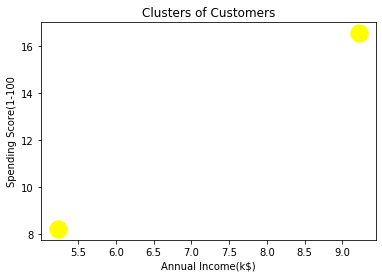

In [61]:
print(model.labels_) #prever a que cluster cada ponto pertence
print(model.cluster_centers_) #para ver onde é o centro de cada cluster

#plt.scatter(X_train[model.labels_==0, 0],X_train[model.labels_==0, 1],s=80,c='magenta',label='Careful')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
#plt.scatter(X_test[:,0], X_test[:,1], c=model.labels_, cmap='rainbow')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

### 4.2 Algoritmo "Local Outlier factor"

#### a. Data preparation for input

#### b. Model Trainig

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

#ground_truth = np.ones(len(X), dtype=int)
#ground_truth[-n_outliers:] = -1

model = LocalOutlierFactor(n_neighbors = 20, metric = 'manhattan', contamination = 0.1) #n_neighbors coloquei 20 porque dizem que no geral é um valor bom
y_pred = model.fit_predict(X)
#n_errors = (y_pred != ground_truth).sum()
X_scores = model.negative_outlier_factor_

#### c. Output results

In [ ]:
outlier_index = where(y_pred == -1) #valores negativos são outliers e positivos inliers
outlier_values = X.iloc[outlier_index]

### 4.3 Algoritmo "Isolation Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators = 50, max_samples = 'auto', contamination = 0.1, max_features = 7)
#n_estimatores = 100 por default; max_features = "It is the number of features to draw from the total features to train each base estimator or tree"
model.fit(X)

scores = model.decision_function(X)
y = model.predict(X)

#### c. Output results

In [ ]:
outliers_counter = len(X[X>9999]) #99999 é suposto ser um outlier
print("Accuracy percentage:", 100*list(X).count(-1)/(outliers_counter))

## 5. Model Exportation 

## 5. Conclusions and Validation
Conclusion and validations belongs to this section